<a href="https://colab.research.google.com/github/2303A52500/AIML-ASSIGNMENTS/blob/main/AIML_ASS_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

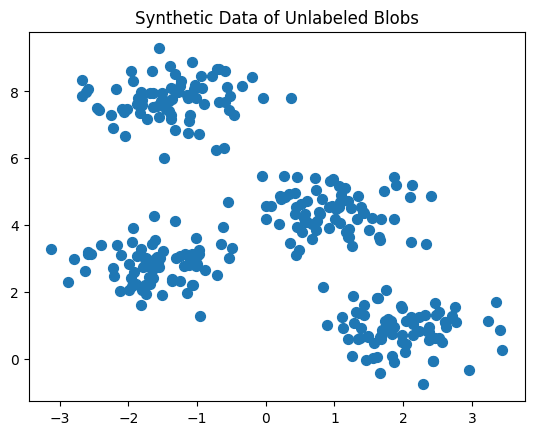

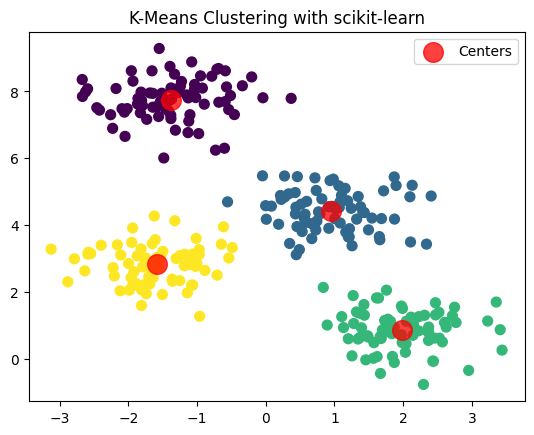

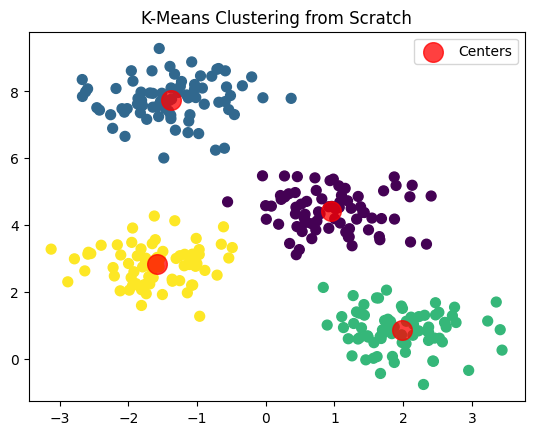

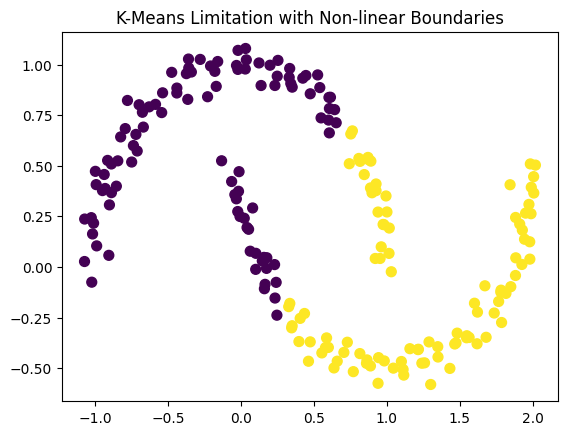

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


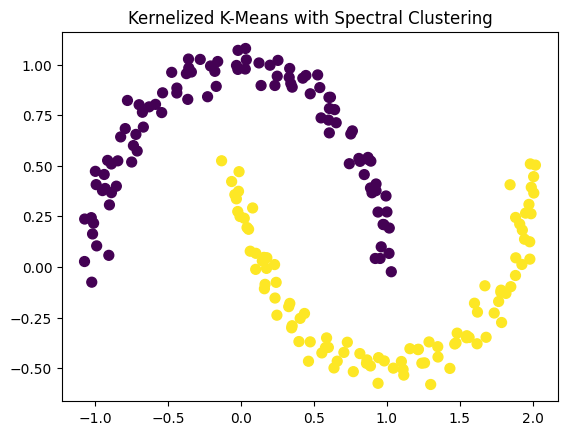

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data of Unlabeled Blobs")
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title("K-Means Clustering with scikit-learn")
plt.legend()
plt.show()

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title("K-Means Clustering from Scratch")
plt.legend()
plt.show()

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(200, noise=0.05, random_state=0)
kmeans_moons = KMeans(n_clusters=2, random_state=0)
labels_moons = kmeans_moons.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=50, cmap='viridis')
plt.title("K-Means Limitation with Non-linear Boundaries")
plt.show()

from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_spectral, s=50, cmap='viridis')
plt.title("Kernelized K-Means with Spectral Clustering")
plt.show()
